# Activity 27 Sep

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [27]:
data=pd.read_csv('/content/drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Label Encoding for categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [28]:
data['Sex']=labelencoder.fit_transform(data['Sex'])

In [29]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY


In [30]:
data['BP']=labelencoder.fit_transform(data['BP'])
data['Cholesterol']=labelencoder.fit_transform(data['Cholesterol'])


In [31]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [32]:
x=data.drop('Drug',axis=1)
y=data['Drug']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 4)

In [16]:
X_train.shape

(150, 5)

In [33]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
110,50,1,0,0,7.490
154,37,1,1,1,16.724
16,69,1,1,1,11.455
19,32,0,0,1,25.974
2,47,1,1,0,10.114


Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.88      0.96      0.92        23
       drugA       0.75      1.00      0.86         6
       drugB       1.00      0.33      0.50         3
       drugC       1.00      0.50      0.67         6
       drugX       0.85      0.92      0.88        12

    accuracy                           0.86        50
   macro avg       0.90      0.74      0.76        50
weighted avg       0.88      0.86      0.85        50



SVM

In [36]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1, gamma='auto')
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        23
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.92      0.96        12

    accuracy                           0.96        50
   macro avg       0.96      0.92      0.93        50
weighted avg       0.96      0.96      0.96        50



KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.88      1.00      0.94        23
       drugA       0.50      0.33      0.40         6
       drugB       0.25      0.33      0.29         3
       drugC       0.50      0.33      0.40         6
       drugX       0.42      0.42      0.42        12

    accuracy                           0.66        50
   macro avg       0.51      0.48      0.49        50
weighted avg       0.64      0.66      0.64        50



In [38]:
from sklearn.neighbors import KNeighborsClassifier
#Find optimum K-value
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [23]:
acc_values

[0.72, 0.72, 0.62, 0.66, 0.66, 0.6, 0.64, 0.66, 0.64, 0.62, 0.62, 0.62, 0.6]

Text(0, 0.5, 'accuracy')

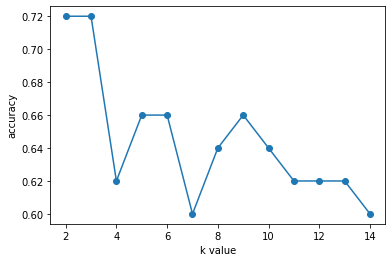

In [39]:
#Plot graph to check optimum k value
import matplotlib.pyplot as plt
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

KNN value 3 seems to have high accuracy. Choosing KNN value as 3

In [40]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.85      1.00      0.92        23
       drugA       0.75      0.50      0.60         6
       drugB       0.50      0.67      0.57         3
       drugC       0.33      0.17      0.22         6
       drugX       0.58      0.58      0.58        12

    accuracy                           0.72        50
   macro avg       0.60      0.58      0.58        50
weighted avg       0.69      0.72      0.70        50



Choosing SVM as the best fitting model as it has high accuracy of 96%

In [41]:
#Test model
print(model1.predict([[50, 1,	0,0,7.490]]))

['drugA']
